<a href="https://colab.research.google.com/github/Ismar-Vicente/An-lise-de-Dados-do-ENEM/blob/master/Copy_of_Dados_do_Enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [0]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [0]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


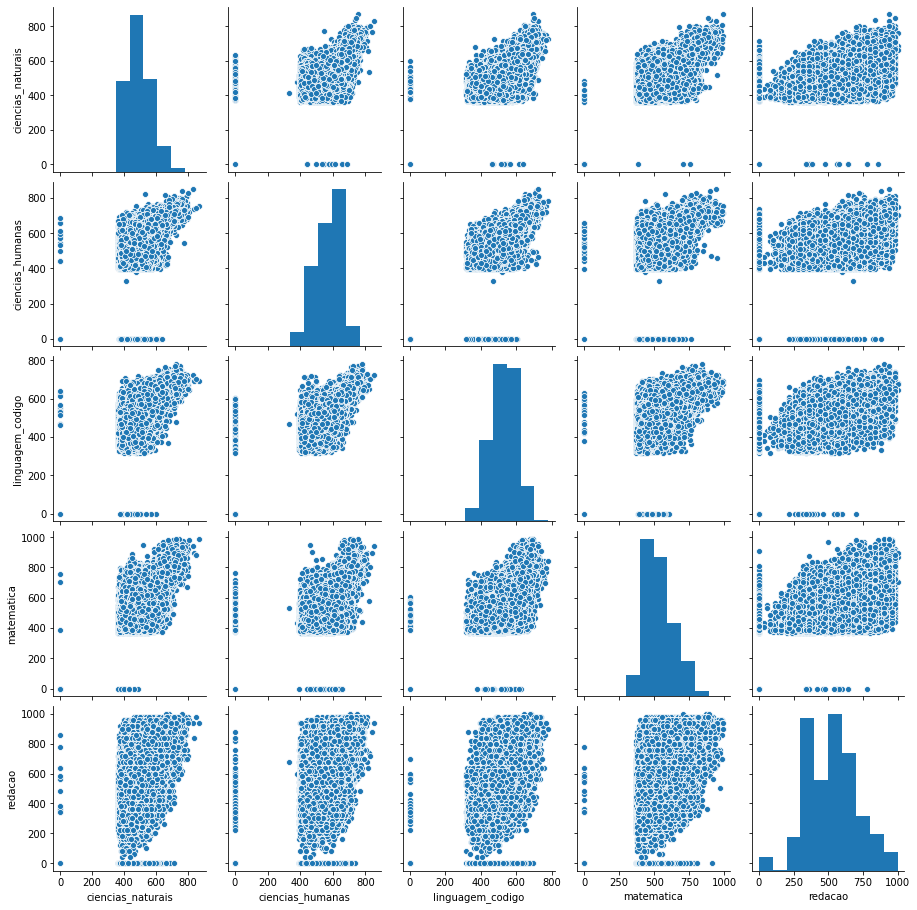

In [0]:
sns.pairplot(dados_notas)

In [0]:
x = dados_notas[['ciencias_naturais','ciencias_humanas', 'matematica', 'redacao']]
x.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


In [0]:
y_adivinhar = dados_notas['linguagem_codigo']
y_adivinhar

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 97270, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y_adivinhar, random_state = 326784)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)


(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [0]:
x_treino.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
25012,610.20,651.90,741.40,660.00
52044,571.70,639.60,639.10,680.00
86543,385.90,569.10,502.00,360.00
36362,424.70,446.20,589.80,420.00
96734,831.40,850.40,943.20,940.00


In [0]:
from sklearn.svm import LinearSVR
modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [0]:
predicoes_notas_linguagem = modelo.predict(x_teste)

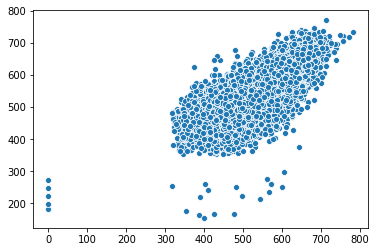

In [0]:
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

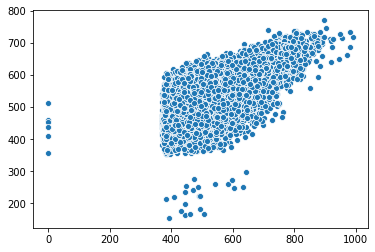

In [0]:
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem)

## Desafio 3
Plotar no eixo x a média das quatro notas

In [0]:
media = (x_teste['ciencias_naturais'] + x_teste['ciencias_humanas'] + x_teste['matematica'] + x_teste['redacao']) / 4
media

67300    607.10
113766   630.62
48328    655.92
9454     545.45
9515     491.50
          ...  
32842    458.08
42388    604.05
55278    407.18
41511    408.23
62897    592.27
Length: 24318, dtype: float64

In [0]:
media_array = media.array

In [0]:
media_array.shape

(24318,)

In [0]:
type(media_array)

pandas.core.arrays.numpy_.PandasArray

In [0]:
predicoes_notas_linguagem

array([591.30581763, 606.46025242, 639.89298788, ..., 418.26406796,
       445.17689891, 578.94210246])

In [0]:
predicoes_notas_linguagem.shape

(24318,)

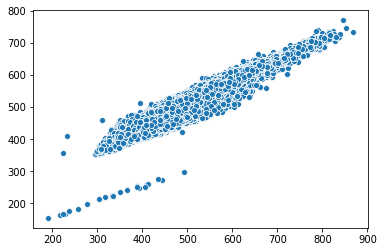

In [0]:
sns.scatterplot(x=media_array, y=predicoes_notas_linguagem)

### Observações:
Quando considerei a média das quadtro notas no eixo x, apareceu uma correlação bem mais definida, isto é, define melhor a predição, ou seja, todas as provas são importantes.

## Desafio 4
### Separar linhas que não contêm valor zero

In [0]:
# considera somente as linhas em que não aparecem zero.  FUNCIONOU!!

# x_teste.loc[~(x_teste==0).any(axis=1)]

In [0]:
# Separando somente as linhas que não contêm o valor zero
dados_no_zero = dados_notas.loc[~(dados_notas==0).any(axis=1)]

In [0]:
dados_no_zero

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00
...,...,...,...,...,...
137835,511.50,606.90,504.80,513.40,520.00
137836,465.00,546.80,528.50,462.80,580.00
137838,576.20,610.40,538.30,486.80,820.00
137840,382.40,534.20,468.10,576.40,380.00


In [0]:
x2 = dados_no_zero[['ciencias_naturais','ciencias_humanas', 'matematica', 'redacao']]
x.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


In [0]:
y2 = dados_no_zero['linguagem_codigo']
y2

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 95181, dtype: float64

In [0]:
x2_treino, x2_teste, y2_treino, y2_teste = train_test_split(x2, y2, random_state = 326784)

print(x2_treino.shape)
print(x2_teste.shape)
print(y2_treino.shape)
print(y2_teste.shape)

(71385, 4)
(23796, 4)
(71385,)
(23796,)


In [0]:
modelo.fit(x2_treino, y2_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [0]:
predicoes_notas_linguagem2 = modelo.predict(x2_teste)

In [0]:
predicoes_notas_linguagem2

array([657.02670666, 782.09846306, 601.87554766, ..., 565.2659071 ,
       608.99426475, 474.2495221 ])

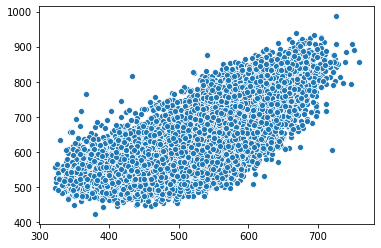

In [0]:

sns.scatterplot(x=y2_teste.values, y=predicoes_notas_linguagem2)

## Desafio 5 
Comparando os gráficos (com e sem zeros)

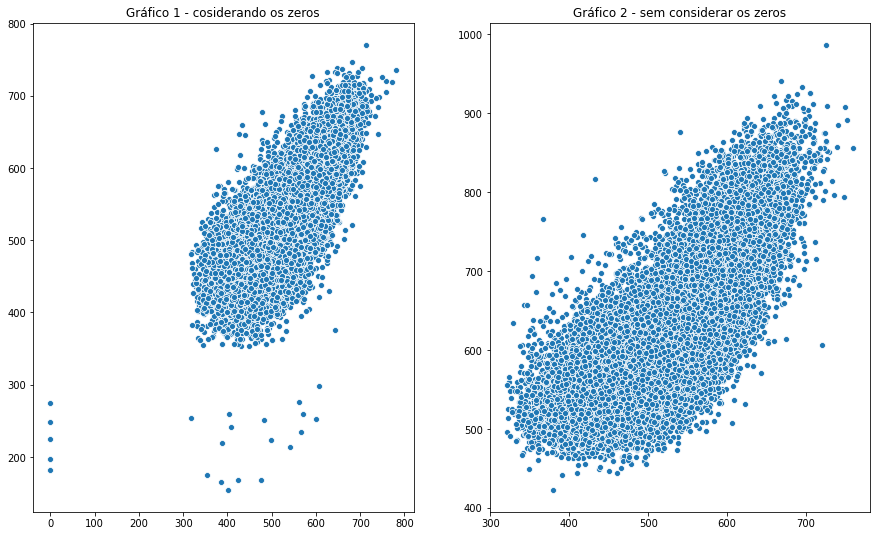

In [0]:
plt.figure(figsize = (15, 9))
plt.subplot(1,2,1)
plt.title("Gráfico 1 - cosiderando os zeros")
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)
plt.subplot(1,2,2)
plt.title("Gráfico 2 - sem considerar os zeros")
sns.scatterplot(x=y2_teste.values, y=predicoes_notas_linguagem2)

##Algumas conclusões
Analisando os dois gráficos, nota-se que:
1 - Com ou sem zeros, os gráficos apresentam correlações parecidas.
2 - Realmente quando se considera os zeros, a média é "puxada" para baixo, como foi dito na aula. Entendo que a predição penaliza os que tiveram notas mais baixas. Note que no Gráfico 2, as predições são bem mais benevolentes. 
3 - Quando não considerei os zeros (Gráfico 2), o resultado é mais focado. Nas figuras acima parace que não é isso que acontece, mas é poque os gráficos estão em escalas diferentes.
4 - Apesar do Gráfico 2 ser mais definido, entendo que o Gráfico 1 é mais real, pois a nota zero existe sim, se fizermos predições sem considerar a existência dessa nota, estamos nos afastando da realidade.
5 - Seria importante um estudo mais aprofundado dos motivos das notas zero. Sugiro checar se o candidato estava presente no dia daquela prova que tirou zero.
